In [153]:
import numpy as np
import scipy.misc as scmisc
from matplotlib.pyplot import imshow
%matplotlib inline

In [107]:
C = scmisc.imread('lena.tif')
CW = scmisc.imread('embed.tif', mode='L')

In [122]:
# Create lena_bin.tif by dithering lena.tif
T = 128
u = np.zeros((514,514))
u[1:513, 1:513] = scmisc.imread('lena.tif', mode='L')
CB = np.zeros((514,514))
for n1 in range(1, 513):
    for n2 in range(1,513):
        CB[n1, n2] = 255 if u[n1, n2] >=T else 0
        e = CB[n1, n2] - u[n1, n2]
        u[n1, n2+1] = u[n1, n2+1] - e*(7/16)
        u[n1+1, n2-1] = u[n1+1, n2-1] - e*(3/16)
        u[n1+1, n2] = u[n1+1, n2] - e*(5/16)
        u[n1+1, n2+1] = u[n1+1, n2+1] - e*(1/16)
CB = np.array(CB[1:513, 1:513], dtype=int)
scmisc.imsave('lena_bin.tif', CB)

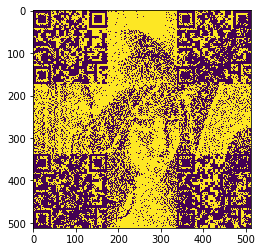

In [154]:
sol = np.bitwise_xor(CB, CW)
imshow(sol)
scmisc.imsave('sol.tif', sol)

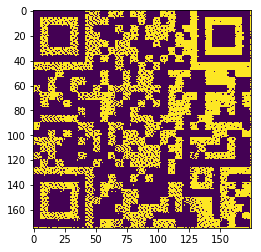

In [155]:
imshow(sol[0:175, 0:175])